# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

MNIST data: 손글씨 데이터

In [1]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [3]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

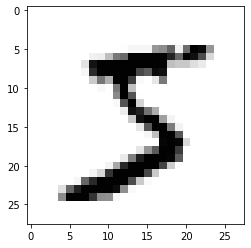

In [4]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape(28, 28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [5]:
y_train.shape

(60000,)

In [6]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [7]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"] #binary는 안 좋음

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [8]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential([
    Dense(256, input_dim=784, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])    

In [9]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "adam",
              metrics = ["accuracy"])

내가 만든 모델을 확인해 봅시다.

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                8224      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 209,514
Trainable params: 209,514
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [11]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2565 - accuracy: 0.9236
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1145 - accuracy: 0.9645
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0845 - accuracy: 0.9736
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0710 - accuracy: 0.9778
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0591 - accuracy: 0.9806
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0517 - accuracy: 0.9827
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0466 - accuracy: 0.9846
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0422 - accuracy: 0.9862
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0364 - accuracy: 0.9875
Epoch 10/100
1875/1875 [==============================] - 3s 1ms/step - l

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091 - accuracy: 0.9975
Epoch 80/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0107 - accuracy: 0.9970
Epoch 81/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0081 - accuracy: 0.9977
Epoch 82/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0104 - accuracy: 0.9971
Epoch 83/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0083 - accuracy: 0.9974
Epoch 84/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0100 - accuracy: 0.9973
Epoch 85/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0094 - accuracy: 0.9971
Epoch 86/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0094 - accuracy: 0.9976
Epoch 87/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0081 - accuracy: 0.9976
Epoch 88/100
1875/1875 [==============================] - 3s 2ms/step - loss:

94%이상의 성능을 가진 모델을 만들면 완성!

In [12]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.1301 - accuracy: 0.9839 - 538ms/epoch - 2ms/step

Accuracy: 0.9839000105857849


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)